<a href="https://colab.research.google.com/github/souhirbenamor/EPF/blob/main/SARIMAX%2C_ARIMA%2C_XGB_for_bridging_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from keras import Sequential
from keras.layers import Dense, LSTM
import tensorflow as tf
import keras

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX




from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Conv1D, Conv2D, MaxPooling1D, Flatten
from keras.layers import GRU

import numpy as np

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_excel('/content/electricty_fund_selected_data 2.xlsx')
df.drop(df.loc[df['Date'].duplicated()].index, inplace = True)
#df['datetime'] = pd.to_datetime(df['Date'])

# df = df.sort_values(df['datetime'], ascending=[True])


df.set_index(df['Date'], inplace = True)
df.drop(columns = [ 'Date'], inplace = True)

In [ ]:
df

,price day ahead Model,Demand DE,Wind,PV,Gas,Coal,CO2
Date,,,,,,,
2014-12-31 23:59:59.991,25.390297,40242.25,8280.00,0.0,21.30,55.17,7.27
2015-01-01 00:59:59.991,24.980000,39158.50,8412.75,0.0,21.30,55.17,7.27
2015-01-01 01:59:59.991,24.796874,38824.50,8502.25,0.0,21.30,55.17,7.27
2015-01-01 02:59:59.991,26.074430,38969.25,8668.50,0.0,21.30,55.17,7.27
2015-01-01 03:59:59.991,20.377994,39092.75,8849.25,0.0,21.30,55.17,7.27
...,...,...,...,...,...,...,...
2020-12-31 18:59:59.980,56.545811,49516.00,8053.50,0.0,19.12,56.49,32.59
2020-12-31 19:59:59.980,50.781170,47747.50,7456.50,0.0,19.12,56.49,32.59
2020-12-31 20:59:59.980,50.781170,47761.75,6902.50,0.0,19.12,56.49,32.59


In [ ]:
#steps=24
dataset_for_prediction= df.copy()
#dataset_for_prediction[' Prices']=dataset_for_prediction[' Prices',' Generation forecast', ' System load forecast'].shift(-steps)
#dataset_for_prediction=dataset_for_prediction.dropna()

In [ ]:
sc_in = MinMaxScaler(feature_range=(0, 1))
scaled_input = sc_in.fit_transform(dataset_for_prediction[['price day ahead Model','Demand DE', 'Wind','PV','Gas', 'Coal','CO2']])
scaled_input =pd.DataFrame(scaled_input)
X= scaled_input

sc_out = MinMaxScaler(feature_range=(0, 1))
scaler_output = sc_out.fit_transform(dataset_for_prediction[['price day ahead Model']])
scaler_output =pd.DataFrame(scaler_output)
y=scaler_output

In [ ]:
list( dataset_for_prediction.columns)

['price day ahead Model', 'Demand DE', 'Wind', 'PV', 'Gas', 'Coal', 'CO2']

In [ ]:
X.rename(columns = {0:'price day ahead Model',
 1:'Demand DE',
 2:'Wind',
 3:'PV',
 4:'Gas',
 5:'Coal',
 6:'CO2',}, inplace = True)

In [ ]:
X.index = dataset_for_prediction.index
X.drop(columns = 'price day ahead Model', inplace = True)

y.rename(columns={0:'Electricity price in 24 hours'}, inplace= True)
y.index=dataset_for_prediction.index

In [ ]:
train_X, train_y = X[24:34944], y[24:34944] 
test_X, test_y = X[34944:].dropna(), y[34944:].dropna()

In [ ]:
test_X

,Demand DE,Wind,PV,Gas,Coal,CO2
Date,,,,,,
2018-12-26 23:59:59.983,0.220033,0.305458,0.0,0.769918,0.788804,0.708447
2018-12-27 00:59:59.983,0.204844,0.304163,0.0,0.769918,0.788804,0.708447
2018-12-27 01:59:59.983,0.208724,0.302021,0.0,0.769918,0.788804,0.708447
2018-12-27 02:59:59.983,0.235638,0.298472,0.0,0.769918,0.788804,0.708447
2018-12-27 03:59:59.983,0.287840,0.291876,0.0,0.769918,0.788804,0.708447
...,...,...,...,...,...,...
2020-12-31 18:59:59.980,0.417945,0.164971,0.0,0.606685,0.408538,0.976158
2020-12-31 19:59:59.980,0.381557,0.152247,0.0,0.606685,0.408538,0.976158
2020-12-31 20:59:59.980,0.381850,0.140439,0.0,0.606685,0.408538,0.976158


In [ ]:
test_y

,Electricity price in 24 hours
Date,
2018-12-26 23:59:59.983,0.353284
2018-12-27 00:59:59.983,0.337738
2018-12-27 01:59:59.983,0.337738
2018-12-27 02:59:59.983,0.337738
2018-12-27 03:59:59.983,0.353284
...,...
2020-12-31 18:59:59.980,0.456646
2020-12-31 19:59:59.980,0.422256
2020-12-31 20:59:59.980,0.422256


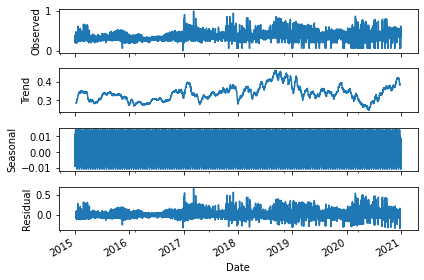

In [ ]:
seas_d=sm.tsa.seasonal_decompose(y,model='add',freq=365);
fig=seas_d.plot()
fig.set_figheight(4)
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller

def test_adf(series, title=''):
    dfout={}
    dftest=sm.tsa.adfuller(series.dropna(), autolag='AIC', regression='ct')
    for key,val in dftest[4].items():
        dfout['critical value {}'.format(key)]=val
    if dftest[1]<=0.05:
        print("Strong evidence against Null Hypothesis")
        print("Reject Null Hypothesis - Data is Stationary")
        print("Data is Stationary", title)
    else:
        print("Strong evidence for  Null Hypothesis")
        print("Accept Null Hypothesis - Data is not Stationary")
        print("Data is NOT Stationary for", title)
        
y_test=y['Electricity price in 24 hours'][24:52380].dropna()
test_adf(y_test, " Electricity Price")

Strong evidence against Null Hypothesis
Reject Null Hypothesis - Data is Stationary
Data is Stationary  Electricity Price


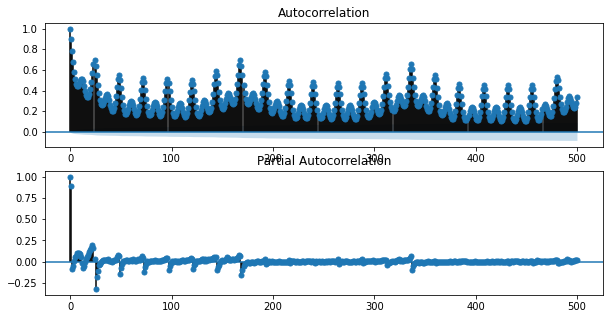

In [ ]:
fig,ax= plt.subplots(2,1, figsize=(10,5))
fig=sm.tsa.graphics.plot_acf(y_test, lags=500, ax=ax[0])
fig=sm.tsa.graphics.plot_pacf(y_test, lags=500, ax=ax[1])
plt.show()

In [ ]:
!sudo pip install pmdarima
from pmdarima.arima import auto_arima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 9.8 MB/s 
     |████████████████████████████████| 9.8 MB 51.3 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
 step_wise = auto_arima(train_y, 
     exogenous= train_X,
     start_p=0, start_q=0, 
     max_p=5, max_q=5, 
     d=1, max_d=168,
     n_jobs = -1,
     start_Q=0,
     max_P=5,
     max_D=5,
     max_Q=5,
     seasonal = True,
     stationary = True,
     trace=True, 
     error_action='ignore', 
     suppress_warnings=True, 
     random = True,
     stepwise=False)

/usr/local/lib/python3.7/dist-packages/pmdarima/arima/_auto_solvers.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  gen = random_state.permutation(list(gen))[:n_fits]
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning



Best model:  ARIMA(1,0,3)(0,0,0)[1] intercept
Total fit time: 548.565 seconds


In [ ]:
step_wise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                34920
Model:               SARIMAX(1, 0, 3)   Log Likelihood               83314.910
Date:                Mon, 30 May 2022   AIC                        -166605.819
Time:                        11:31:27   BIC                        -166504.289
Sample:                             0   HQIC                       -166573.476
                              - 34920                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0038      0.000     10.200      0.000       0.003       0.005
Demand DE      0.2449      0.002    136.685      0.000       0.241       0.248
Wind          -0.1470      0.003    -47.436      0.000      -0.153      -0.141
PV            -0.1349      0.002    -88.905      0.000      -0.138      -0.132
Gas            0.1621      0.014     11.849      0.000       0.135       0.189
Coal           0.0628      0.005     12.699      0.000       0.053       0.073
CO2            0.0208      0.011      1.875      0.061      -0.001       0.043
ar.L1          0.9681      0.002    470.041      0.000       0.964       0.972
ma.L1         -0.4133      0.002   -168.323      0.000      -0.418      -0.408
ma.L2         -0.1926      0.004    -44.814      0.000      -0.201      -0.184
ma.L3         -0.1262      0.005    -23.486      0.000      -0.137      -0.116
sigma2         0.0005   9.43e-07    525.184      0.000       0.000       0.000
===================================================================================
Ljung-Box (Q):                     3847.80   Jarque-Bera (JB):           5842754.17
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.14   Skew:                             3.76
Prob(H) (two-sided):                  0.00   Kurtosis:                        65.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model= SARIMAX(train_y, 
 exog=train_X,
 order=(1,0,3),
enforce_invertibility=False, enforce_stationarity=False)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  the underlying index is a RangeIndex or an integral index.


In [ ]:
results=model.fit()

forecast = results.forecast(steps=17664, exog = test_X)

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  # If no frequency, try to get an inferred frequency


In [ ]:
train_size = 34944
test_size = 52608
steps = -24

In [ ]:
y


,Electricity price in 24 hours
Date,
2014-12-31 23:59:59.991,0.270783
2015-01-01 00:59:59.991,0.268335
2015-01-01 01:59:59.991,0.267243
2015-01-01 02:59:59.991,0.274864
2015-01-01 03:59:59.991,0.240881
...,...
2020-12-31 18:59:59.980,0.456646
2020-12-31 19:59:59.980,0.422256
2020-12-31 20:59:59.980,0.422256


In [ ]:
predictions= results.predict(start = 34944, end=52608+(steps)-1 ,exog=test_X)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  # If no frequency, try to get an inferred frequency


In [ ]:
forecast_electricity= pd.DataFrame(forecast)
forecast_electricity.reset_index(drop=True, inplace=True)
forecast_electricity.index=test_X.index
forecast_electricity['Actual'] =scaler_output.iloc[34944:, 0]
forecast_electricity.rename(columns={0:'Forecast'}, inplace=True)

In [ ]:

forecast_electricity['Forecast']

Date
2018-12-26 23:59:59.983    0.347187
2018-12-27 00:59:59.983    0.337853
2018-12-27 01:59:59.983    0.335949
2018-12-27 02:59:59.983    0.342889
2018-12-27 03:59:59.983    0.356518
                             ...   
2020-12-31 18:59:59.980    0.279850
2020-12-31 19:59:59.980    0.272543
2020-12-31 20:59:59.980    0.274216
2020-12-31 21:59:59.980    0.267821
2020-12-31 22:59:59.980    0.259336
Name: Forecast, Length: 17664, dtype: float64

In [ ]:
forecast_electricity['Actual']

Date
2018-12-26 23:59:59.983    0.353284
2018-12-27 00:59:59.983    0.337738
2018-12-27 01:59:59.983    0.337738
2018-12-27 02:59:59.983    0.337738
2018-12-27 03:59:59.983    0.353284
                             ...   
2020-12-31 18:59:59.980    0.456646
2020-12-31 19:59:59.980    0.422256
2020-12-31 20:59:59.980    0.422256
2020-12-31 21:59:59.980    0.422256
2020-12-31 22:59:59.980    0.405779
Name: Actual, Length: 17664, dtype: float64

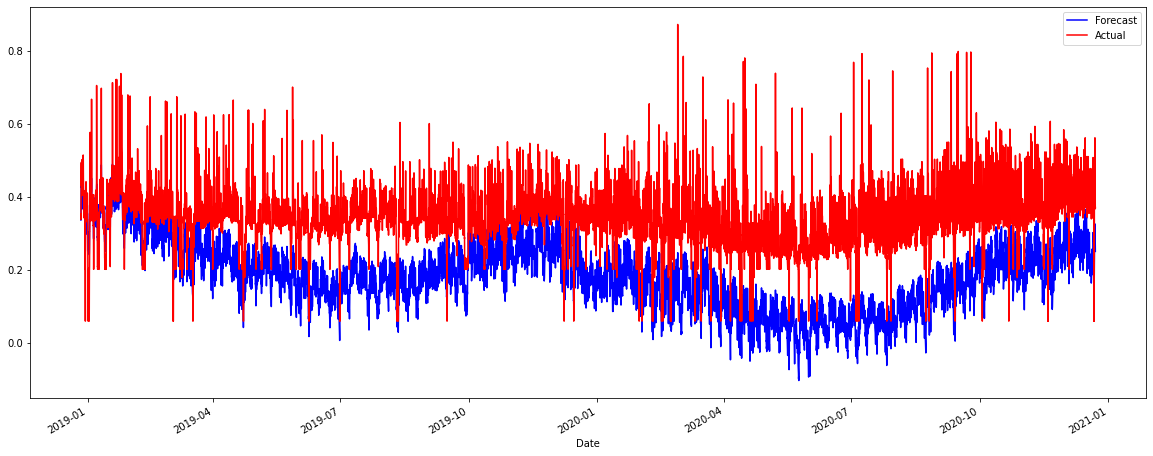

In [ ]:
forecast_electricity['Forecast'][:17448].plot(figsize=(20,8), legend=True, color='blue')
forecast_electricity['Actual'][:17448].plot(legend=True, color='red', figsize=(20,8))

In [ ]:
from numpy import inf

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    difference = abs((y_true - y_pred))
    difference[difference == inf] = 0.01
    difference[difference == -inf] = 0.01
    difference[difference == 0] = 0.01
    y_true[y_true == 0] = 0.01
    return np.mean((difference/y_true) * 100)

In [ ]:
mape = mean_absolute_percentage_error(forecast_electricity['Actual'], forecast_electricity['Forecast'])
mape

49.691300839684864

In [ ]:
act= pd.DataFrame(scaler_output.iloc[train_size:, 0])

In [ ]:
act.head()

,Electricity price in 24 hours
Date,
2018-12-26 23:59:59.983,0.353284
2018-12-27 00:59:59.983,0.337738
2018-12-27 01:59:59.983,0.337738
2018-12-27 02:59:59.983,0.337738
2018-12-27 03:59:59.983,0.353284


In [ ]:
predictions=pd.DataFrame(predictions)
predictions.reset_index(drop=True, inplace=True)
predictions.index=test_X[24:].index
predictions['Actual'] = act['Electricity price in 24 hours']
predictions.rename(columns={0:'Pred'}, inplace=True)

In [ ]:
testPredict = sc_out.inverse_transform(predictions[['Pred']])
testActual = sc_out.inverse_transform(predictions[['Actual']])
unscaled = pd.DataFrame(testPredict)
unscaled['actual'] = testActual
unscaled = unscaled.rename(columns={0: 'predictions'})

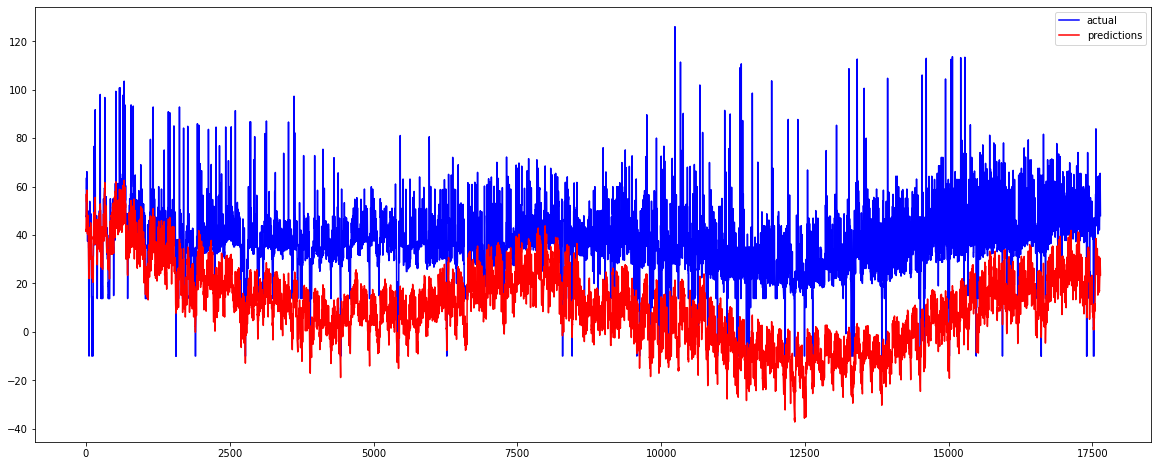

In [ ]:
unscaled['actual'].plot(figsize=(20,8), legend=True, color='blue')
unscaled['predictions'].plot(legend=True, color='red', figsize=(20,8))

In [ ]:
unscaled['actual']

0        47.672000
1        47.672000
2        47.672000
3        47.672000
4        47.672000
           ...    
17635    56.545811
17636    50.781170
17637    50.781170
17638    50.781170
17639    48.019167
Name: actual, Length: 17640, dtype: float64

In [ ]:
unscaled['predictions']

0        42.222328
1        41.490764
2        41.645051
3        42.822272
4        45.201856
           ...    
17635    26.910105
17636    25.685315
17637    25.965671
17638    24.893787
17639    23.471385
Name: predictions, Length: 17640, dtype: float64

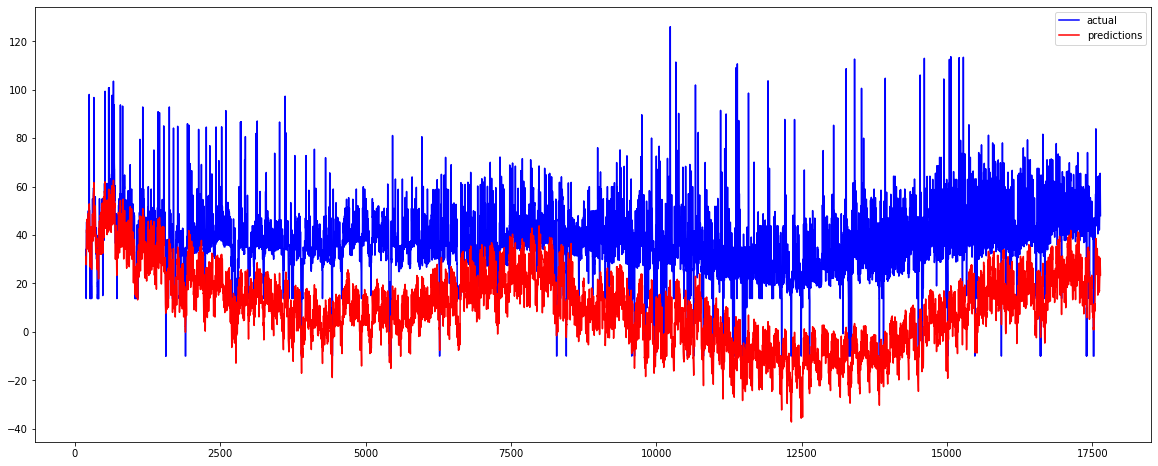

In [ ]:
unscaled['actual'][-17448:].plot(figsize=(20,8), legend=True, color='blue')
unscaled['predictions'][-17448:].plot(legend=True, color='red', figsize=(20,8))
plt.savefig('SARIMAX', figsize=(20,8), transparent=True, dpi=300)

In [ ]:
#Save pred results
import csv 
unscaled = pd.DataFrame(unscaled)
unscaled.to_csv("Unscaled_SARIMAX_rslts.csv", header=True, quoting=csv.QUOTE_NONE, escapechar=' ')



# **XGBoost**

In [ ]:
!sudo pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree

In [ ]:
from sklearn.model_selection import GridSearchCV
xgb1 = xgb.XGBRegressor()
parameters = { #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [100,500, 1000],
             'n_jobs' : [-1]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 5,
                        n_jobs = -1,
                        verbose=True)

xgb_grid.fit(train_X,
         train_y)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
0.45757350112856165
{'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 100, 'n_jobs': -1, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [ ]:
xgbbest = xgb.XGBRegressor(min_child_weight = 4, max_depth = 5, n_estimators = 100, learning_rate=0.05, colsample_bytree =0.7, n_jobs = -1, silent = 1 , subsample = 0.7)
xgbbest.fit(train_X,
         train_y)

XGBRegressor(colsample_bytree=0.7, learning_rate=0.05, max_depth=5,
             min_child_weight=4, n_jobs=-1, silent=1, subsample=0.7)

In [ ]:
predictionsxgb = xgbbest.predict(test_X)

In [ ]:
predictionsxgb=pd.DataFrame(predictionsxgb)
predictionsxgb.reset_index(drop=True, inplace=True)
predictionsxgb.index=test_X.index
predictionsxgb['Actual'] = act['Electricity price in 24 hours']
predictionsxgb.rename(columns={0:'Pred'}, inplace=True)

In [ ]:
testPredictxgb = sc_out.inverse_transform(predictions[['Pred']])
testActualxgb = sc_out.inverse_transform(predictions[['Actual']])

unscaledxgb = pd.DataFrame(testPredictxgb)
unscaledxgb['actual'] = testActualxgb
unscaledxgb = unscaledxgb.rename(columns={0: 'predictions'})

In [ ]:
unscaledxgb['actual']

0        47.672000
1        47.672000
2        47.672000
3        47.672000
4        47.672000
           ...    
17635    56.545811
17636    50.781170
17637    50.781170
17638    50.781170
17639    48.019167
Name: actual, Length: 17640, dtype: float64

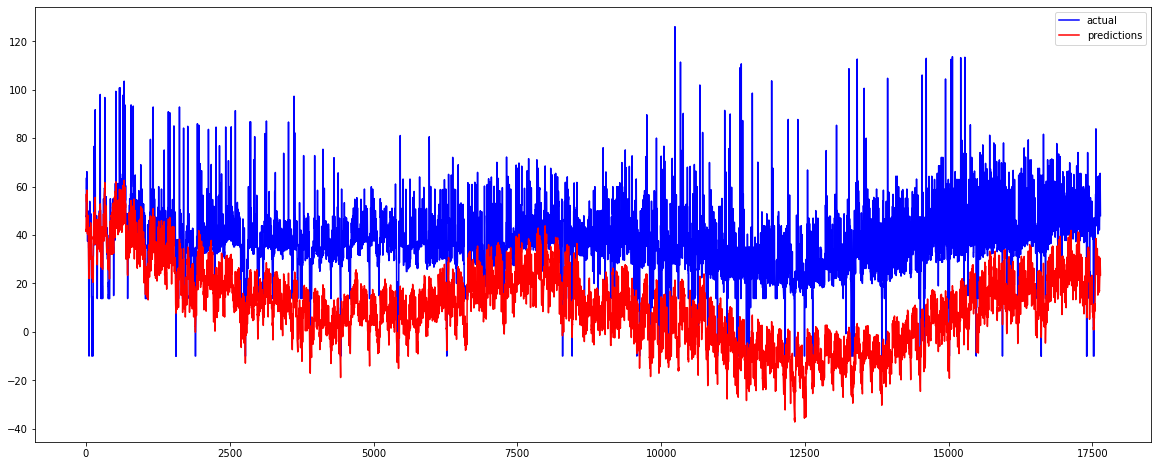

In [ ]:
unscaledxgb['actual'].plot(figsize=(20,8), legend=True, color='blue')
unscaledxgb['predictions'].plot(legend=True, color='red', figsize=(20,8))
plt.savefig('XGP', figsize=(20,8), transparent=True, dpi=300)

In [ ]:
mape = mean_absolute_percentage_error(unscaledxgb['actual'], unscaledxgb['predictions'])
mape

79.12319819393394

In [ ]:
#Save pred results
import csv 
unscaledxgb = pd.DataFrame(unscaled)
unscaled.to_csv("Unscaled_XGB_rslts.csv", header=True, quoting=csv.QUOTE_NONE, escapechar=' ')

# **SARIMA**

In [ ]:
model= SARIMAX(train_y, order=(2,0,2),
enforce_invertibility=False, enforce_stationarity=False)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  the underlying index is a RangeIndex or an integral index.


In [ ]:
results=model.fit()

forecast = results.forecast(steps=17664)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  # If no frequency, try to get an inferred frequency


In [ ]:
train_size = 34944
test_size = 52608
steps = -24

In [ ]:
predictions= results.predict(start = 34944, end=52608+(steps)-1)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  # If no frequency, try to get an inferred frequency


In [ ]:
forecast_electricity= pd.DataFrame(forecast)
forecast_electricity.reset_index(drop=True, inplace=True)
forecast_electricity.index=test_X.index
forecast_electricity['Actual'] =scaler_output.iloc[34944:, 0]
forecast_electricity.rename(columns={0:'Forecast'}, inplace=True)

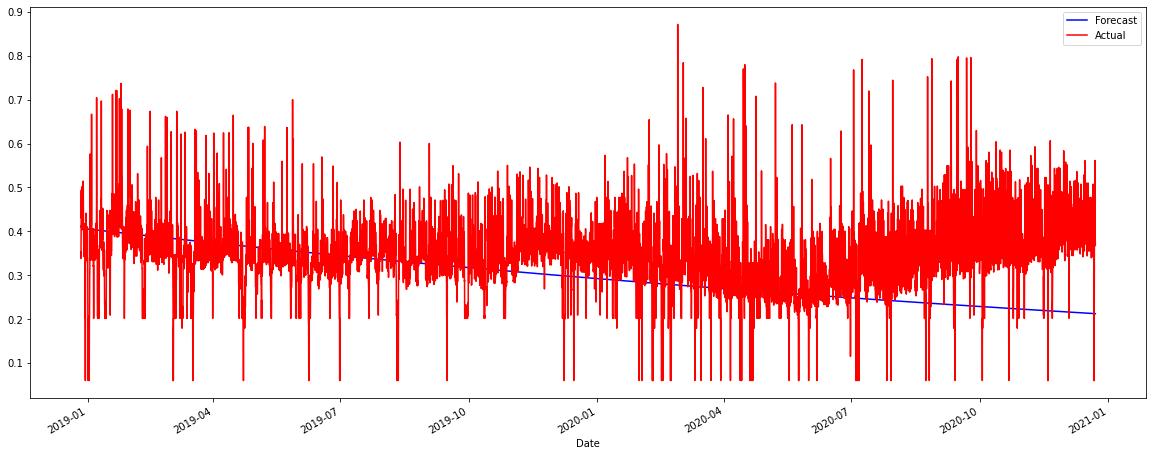

In [ ]:
forecast_electricity['Forecast'][:17448].plot(figsize=(20,8), legend=True, color='blue')
forecast_electricity['Actual'][:17448].plot(legend=True, color='red', figsize=(20,8))

In [ ]:
predictions=pd.DataFrame(predictions)
predictions.reset_index(drop=True, inplace=True)
predictions.index=test_X[24:].index
predictions['Actual'] = act['Electricity price in 24 hours']
predictions.rename(columns={0:'Pred'}, inplace=True)

In [ ]:
from numpy import inf

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    difference = abs((y_true - y_pred))
    difference[difference == inf] = 0.01
    difference[difference == -inf] = 0.01
    difference[difference == 0] = 0.01
    y_true[y_true == 0] = 0.01
    return np.mean((difference/y_true) * 100)

In [ ]:
mape = mean_absolute_percentage_error(forecast_electricity['Actual'], forecast_electricity['Forecast'])
mape

24.64783736504669

In [ ]:
act= pd.DataFrame(scaler_output.iloc[train_size:, 0])

In [ ]:
testPredict = sc_out.inverse_transform(predictions[['Pred']])
testActual = sc_out.inverse_transform(predictions[['Actual']])

In [ ]:
testPredict = sc_out.inverse_transform(predictions[['Pred']])
testActual = sc_out.inverse_transform(predictions[['Actual']])


unscaled = pd.DataFrame(testPredict)
unscaled['actual'] = testActual
unscaled = unscaled.rename(columns={0: 'predictions'})

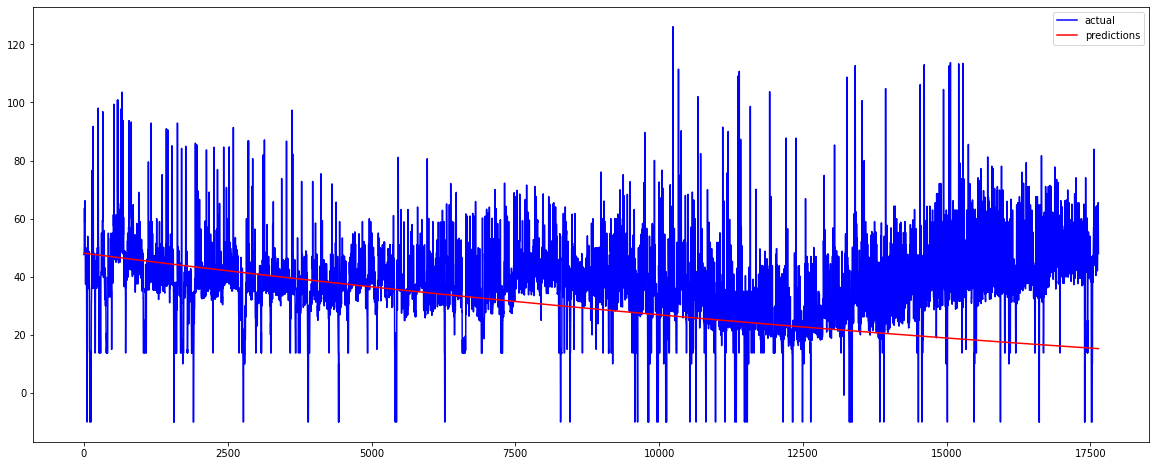

In [ ]:
unscaled['actual'].plot(figsize=(20,8), legend=True, color='blue')
unscaled['predictions'].plot(legend=True, color='red', figsize=(20,8))

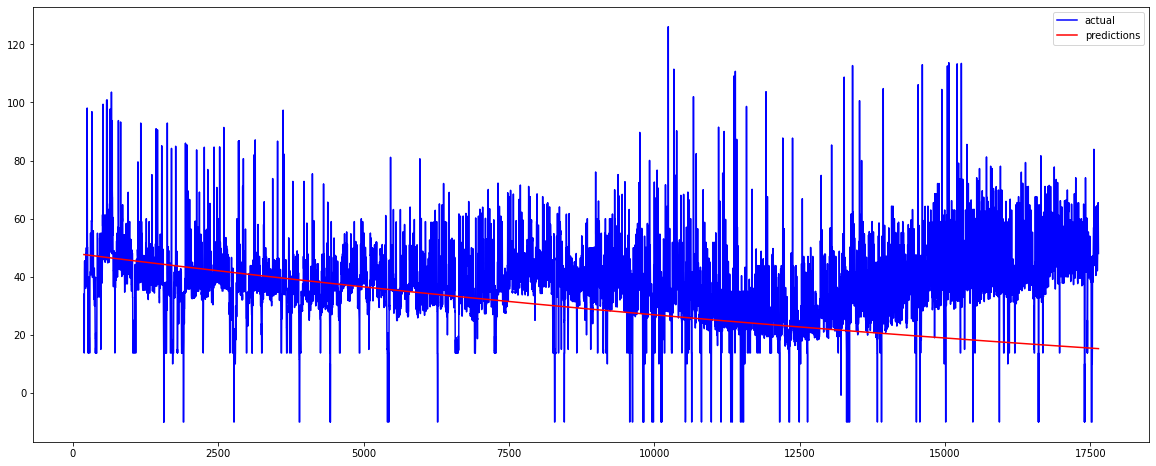

In [ ]:
unscaled['actual'][-17448:].plot(figsize=(20,8), legend=True, color='blue')
unscaled['predictions'][-17448:].plot(legend=True, color='red', figsize=(20,8))
plt.savefig('SARIMA', figsize=(20,8), transparent=True, dpi=300)

In [ ]:
#Save pred results
import csv 
unscaled = pd.DataFrame(unscaled)
unscaled.to_csv("Unscaled_SARIMA_rslts.csv", header=True, quoting=csv.QUOTE_NONE, escapechar=' ')
